In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
data_file_path = "transactions.txt"  

# Read the data from the text file into a list
with open(data_file_path, "r") as file:
    json_data = file.readlines()

# Convert each JSON line into a Python dictionary
data_list = [json.loads(line.strip()) for line in json_data]

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# Now df contains transaction data in a DataFrame


csv_file = df.to_csv('transaction.csv', index=False)
df = pd.read_csv('transaction.csv')

columns_to_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
# Drop the specified columns with 0 non-null values in place
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


### Plot

In [5]:
df['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

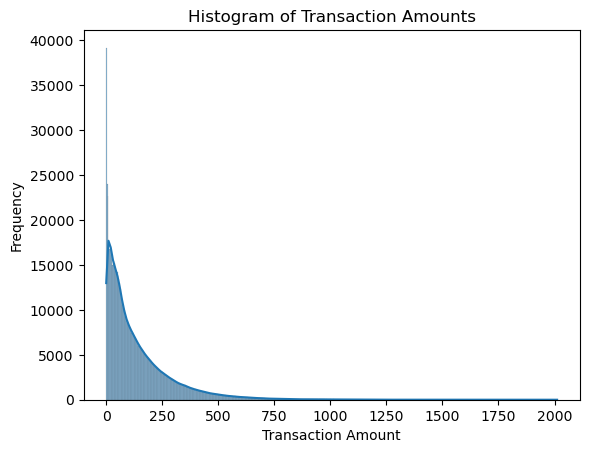

In [8]:
transaction_amounts = df['transactionAmount']

# Create a histogram
sns.histplot(x=transaction_amounts, kde=True)

# Add labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')

# Show the plot
plt.show()

### Observations:

- Right-Skewed Distribution: The histogram is right-skewed with a long tail to the right. There are fewer transactions with very high amounts, but a larger number of transactions with lower amounts.

- Peak Frequency: There is a peak in frequency at lower transaction amounts indicating a concentration of transactions around a specific range.

- Outliers: The long tail on the right side of the histogram suggests the presence of outliers - transactions with significantly higher amounts compared to the majority.

### Hypotheses:

- Common Transaction Range: The peak in frequency suggests that there is a common range of transaction amounts that most customers engage in regularly. This could represent typical day-to-day spending.

- Merchant Categories: Transactions might differ based on the type of merchant (e.g., retail, travel, dining). Specific merchant categories may have different typical transaction amounts. 

- High-Value Transactions: The presence of outliers suggests that there might be occasional high-value transactions. Hypothesize that these high-value transactions could be related to specific events or purchases, such as travel bookings, major expenses, or luxury purchases.

- Fraud Detection: Anomalies in transaction amounts, such as transactions significantly deviating from the common range, could be potential indicators of fraudulent activities. Fraud detection models could use transaction amounts as one of the features for identifying fraud.

- Customer Segmentation: The distribution might vary for different customer segments. Certain groups of customers (e.g., high-net-worth individuals, business clients) might have different transaction amount patterns.
